## **MNIST Dataset (Identifying Hand Written Numbers)**

In [1]:
# importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# printing the lengths of all the training and testing arrays
print("Number of Samples in the training and testing datasets:\n")
print("X_train: ",len(X_train))
print("X_test : ",len(X_test))
print("y_train: ",len(y_train))
print("y_test : ",len(y_test))

Number of Samples in the training and testing datasets:

X_train:  60000
X_test :  10000
y_train:  60000
y_test :  10000


First 10 hand written digits in the training data set [X_train] with corresponding [y_train] values:



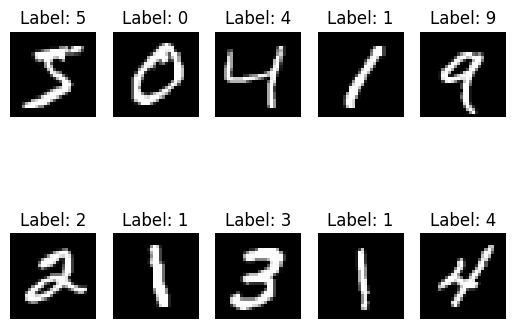

In [4]:
# printing the first 10 hand written digits in the training data set X_train with corresponding y_train values
print("First 10 hand written digits in the training data set [X_train] with corresponding [y_train] values:\n")
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.show()

First 10 hand written digits in the training data set [X_test] with corresponding [y_test] values:



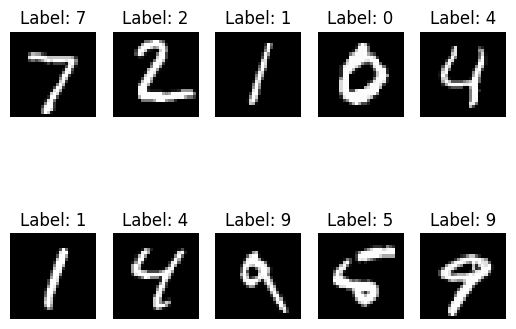

In [5]:
# printing the first 10 hand written digits in the training data set x_test
print("First 10 hand written digits in the training data set [X_test] with corresponding [y_test] values:\n")
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')

plt.show()

In [ ]:
plt.matshow(X_train[0])

In [6]:
print("Scaling the X_train, X_test:\n")
X_train = X_train/255
X_test = X_test/255        # Scaling the data to keep values between 0 and 1


Scaling the X_train, X_test:



In [ ]:
print(X_train)
print(X_test)

In [7]:
X_train_flattened = X_train.reshape(len(X_train),28*28)     # to 1 D
print("Flattened X_train i.e., converted to 1D array: ",X_train_flattened.shape)

X_test_flattened = X_test.reshape(len(X_test),28*28)
print("\nFlattened X_test i.e., converted to 1D array: ",X_test_flattened.shape)


Flattened X_train i.e., converted to 1D array:  (60000, 784)

Flattened X_test i.e., converted to 1D array:  (10000, 784)


Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2674 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1189 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0832 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9844


Training the model with Sequential as model container,activation functions as ReLu, Sigmoid
 adam optimiser, 5 epochs,accuracy as metrics
 and sparse_categorical_crossentropy as loss:



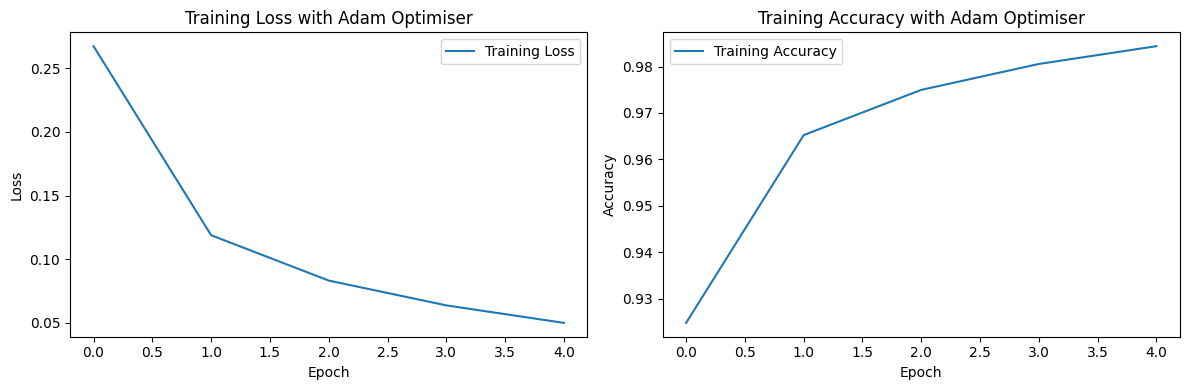

In [8]:
# Building and training a model
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')])

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

# model.fit(X_train_flattened,y_train,epochs=5)
# Train the model and store history
history = model.fit(X_train_flattened, y_train, epochs=5, verbose=1)

print("\n\nTraining the model with Sequential as model container,activation functions as ReLu, Sigmoid\n adam optimiser, 5 epochs,accuracy as metrics\n and sparse_categorical_crossentropy as loss:\n")

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with Adam Optimiser')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy with Adam Optimiser')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9755


[0.07832883298397064, 0.9754999876022339]

In [ ]:
plt.matshow(X_test[0])

In [11]:
y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_predict[0]

array([4.6995520e-03, 1.0767107e-04, 2.5623330e-01, 7.5862122e-01,
       4.9109891e-05, 2.2515452e-03, 3.5702493e-07, 9.9998516e-01,
       4.4532981e-02, 3.0240762e-01], dtype=float32)

In [13]:
np.argmax(y_predict[0])    # actual prediction, and prediction in correct

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predict]

In [15]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [17]:
con_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

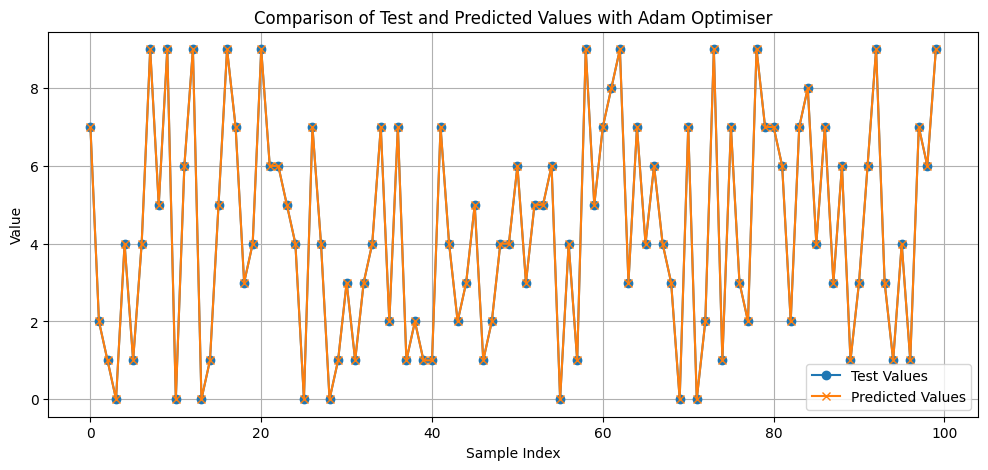

In [18]:
import matplotlib.pyplot as plt

# Define the number of samples to visualize
num_samples = 100

# Plot the first few predicted and test values
plt.figure(figsize=(12, 5))
plt.plot(range(num_samples), y_test[:num_samples], label='Test Values', marker='o')
plt.plot(range(num_samples), y_predicted_labels[:num_samples], label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Test and Predicted Values with Adam Optimiser')
plt.legend()
plt.grid(True)
plt.show()


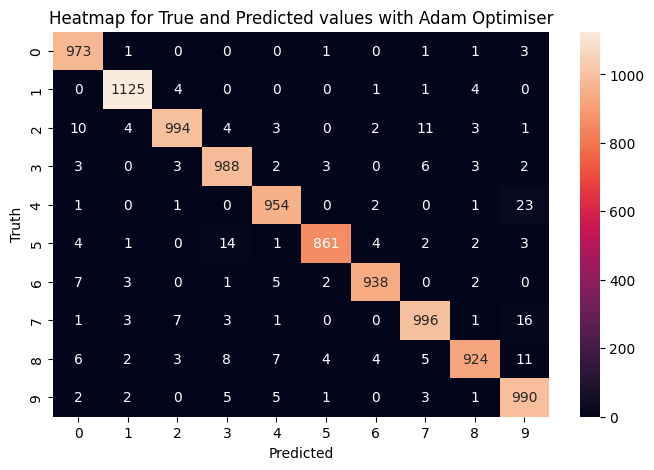

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(con_mat,annot=True,fmt="d")
plt.title("Heatmap for True and Predicted values with Adam Optimiser")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6496 - accuracy: 0.8361
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3373 - accuracy: 0.9056
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2907 - accuracy: 0.9175
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2613 - accuracy: 0.9258
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9326


Training the model with Sequential as model container,activation functions as ReLu, Sigmoid
 SGD optimiser, 5 epochs,accuracy as metrics
 and sparse_categorical_crossentropy as loss:



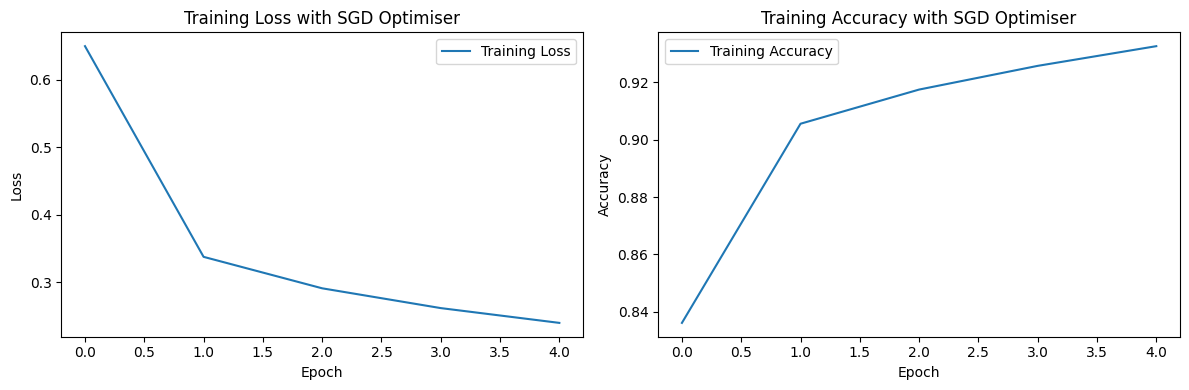

In [ ]:
# with SGD Optimiser adding the hidden layer
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

model.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

# model.fit(X_train_flattened,y_train,epochs=5)

# Train the model and store history
history = model.fit(X_train_flattened, y_train, epochs=5, verbose=1)

print("\n\nTraining the model with Sequential as model container,activation functions as ReLu, Sigmoid\n SGD optimiser, 5 epochs,accuracy as metrics\n and sparse_categorical_crossentropy as loss:\n")
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with SGD Optimiser')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy with SGD Optimiser')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2187 - accuracy: 0.9378


[0.21873478591442108, 0.9377999901771545]

In [ ]:
y_predict = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predict]
con_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

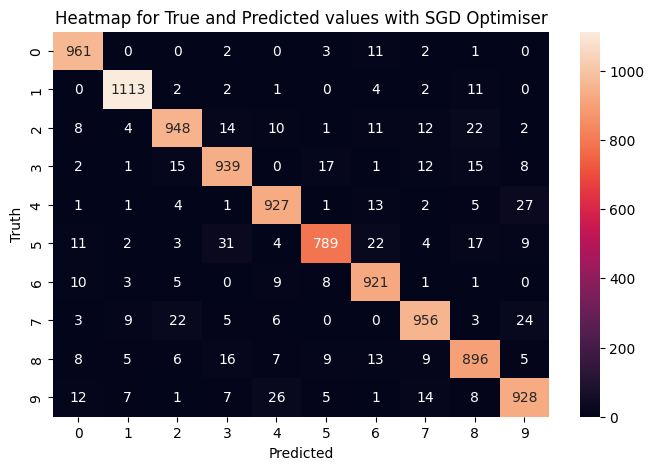

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(con_mat,annot=True,fmt="d")
plt.title("Heatmap for True and Predicted values with SGD Optimiser")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

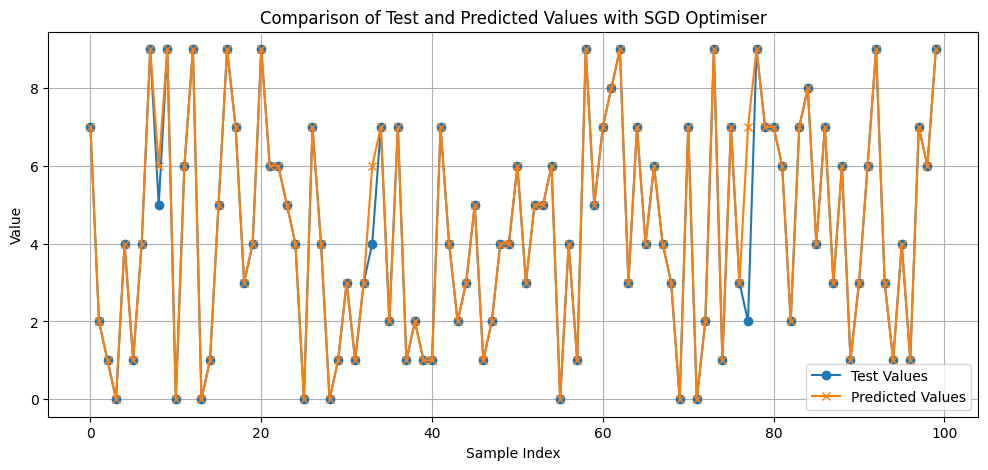

In [ ]:
import matplotlib.pyplot as plt

# Define the number of samples to visualize
num_samples = 100

# Plot the first few predicted and test values
plt.figure(figsize=(12, 5))
plt.plot(range(num_samples), y_test[:num_samples], label='Test Values', marker='o')
plt.plot(range(num_samples), y_predicted_labels[:num_samples], label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Test and Predicted Values with SGD Optimiser')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# without explicitly flattenning but using keras in built flattener
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

# tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train,y_train,epochs=5)

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9371


[0.2257397174835205, 0.9370999932289124]

In [ ]:
y_predict = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predict]
con_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(8,6,7))
sns.heatmap(con_mat,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# without explicitly flattenning but using keras in built flattener
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

model.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6485 - accuracy: 0.8367
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3388 - accuracy: 0.9052
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2901 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2605 - accuracy: 0.9270
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2379 - accuracy: 0.9334


In [ ]:
# adding the hidden layer
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

model.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

# model.fit(X_train_flattened,y_train,epochs=5)

# Train the model and store history
history = model.fit(X_train_flattened, y_train, epochs=5, verbose=1)

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss with Adam Optimiser')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy with Adam Optimiser')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2682 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0850 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9844


## **Tutorial 8 : Activation Function:**

In [ ]:
# use sigmoid in output layers, at all other places use tanh who value lies between -1 and 1, if derivatives are close to 0 then leads to VG problem.
# both has vanishing gradient problem.
# as a solution we came up with ReLU (0,max)  ie., if value is <0 --> output=0, if value>0 --> output = that value
# for hidden layers, ReLU is always default choice though VG problem ie., derviative is 0 for < 0
# so Leaky ReLU is alternative . x ---> output is 0.1*x

In [ ]:
# Linear Eq --> Slope and its a constant
# Non Linear Eq --> Derivative and its a function

#**Gradient Descent Lecture 12**